In [3]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [116]:
aic_scores = []
ns_terms = []
s_terms = []


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            aic_scores.append(results.aic)
            ns_terms.append(param)
            s_terms.append(param_seasonal)
        
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2845.5912062488587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1391829.5402090072
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2076.3415141028054
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1794.6817180886085
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1989.6708483049397
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1922.801782269305
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1714.273990182954
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1681.0979372544286
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2748.8222379560502
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1379761.726937408
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2090.3373342753857
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1748.1287359027306
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2637.335573407825
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2392.9586717718653
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1780.9660419921702
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1735.0351774422518
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1895.3247410067997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1665.1562696338

In [117]:
aic_index = aic_scores.index(min(aic_scores))

In [120]:
ns_terms[aic_index]

(1, 1, 1)

In [121]:
s_terms[aic_index]

(0, 1, 1, 12)

In [122]:
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5577      0.116      4.804      0.000       0.330       0.785
ma.L1          0.6328      0.120      5.274      0.000       0.398       0.868
ma.S.L12      -0.0303      0.040     -0.767      0.443      -0.108       0.047
sigma2      4.333e+06   1.08e+06      4.014      0.000    2.22e+06    6.45e+06


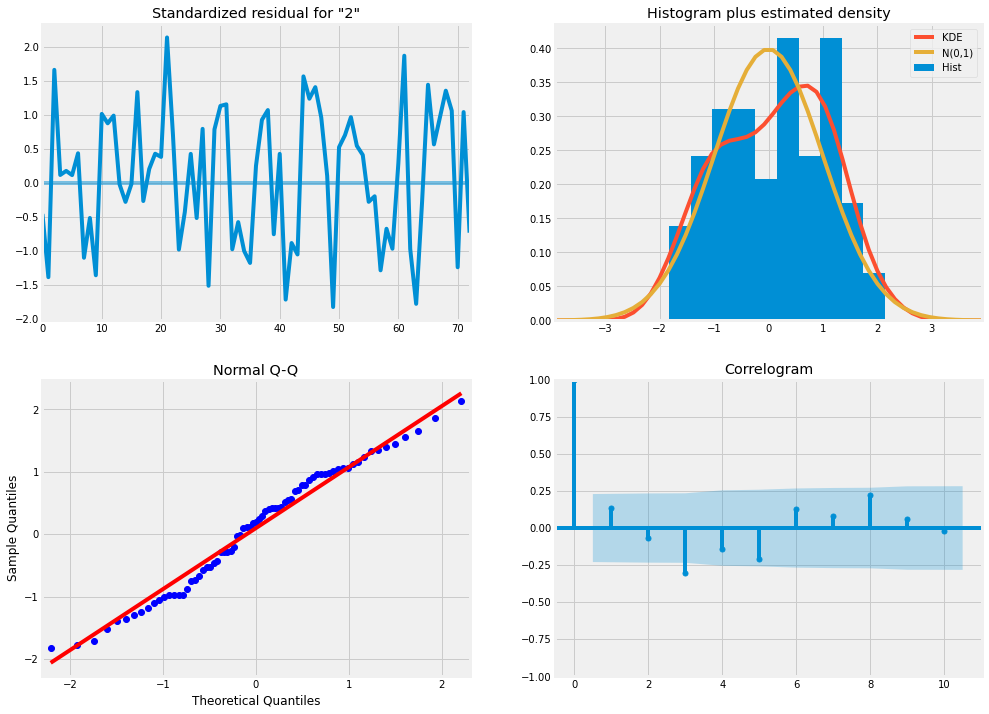

In [123]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Series 1996-2018
--

In [124]:
# Now running the full time series (including from 1996-2008)
series2 = pd.read_csv('top_zip_series.csv')

In [125]:
warnings.filterwarnings("ignore")

aic_scores_mod2_list = []
params2_list = []
seas_params2_list = []

for param2 in pdq:
    for param_seasonal2 in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(series2,
                                            order=param2,
                                            seasonal_order=param_seasonal2,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod2.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param2, param_seasonal2, results2.aic))
            aic_scores_mod2_list.append(results2.aic)
            params2_list.append(param2)
            seas_params2_list.append(param_seasonal2)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7484.146673636384
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6991.1848581238355
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5942.374139480978
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5669.016677775853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5861.684910508812
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5807.2950076185925
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5508.766073310061
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7208.984469011708
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7265.320752515131
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7258.551100172991
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5951.808786245938
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8026.060306957823
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7387.587944340341
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6873.399271025764
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5475.894889922207
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7270.781199736346
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4980.086862365197
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4728.678410516746
ARIMA(0,

In [126]:
mod2 = sm.tsa.statespace.SARIMAX(series2,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod2.fit()

print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6708      0.058     11.658      0.000       0.558       0.784
ma.L1          0.6382      0.044     14.465      0.000       0.552       0.725
ma.S.L12      -0.2370      0.036     -6.640      0.000      -0.307      -0.167
sigma2      2.379e+06   2.56e+05      9.297      0.000    1.88e+06    2.88e+06


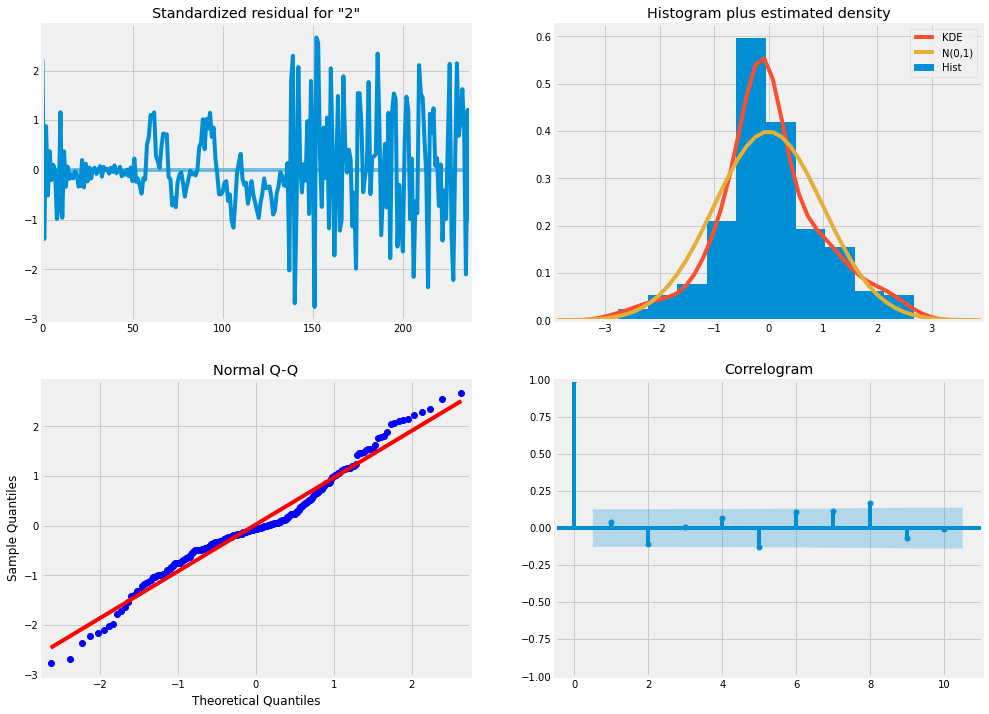

In [127]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

ARIMA: A Better Fit For 2010-2018 Series Data
--

The lowest AIC score for 2010-2018 Series Data is ~1328 while the lowest AIC score for the complete Series is ~4151, showing us that the 2010-2018 Series can be handled better with ARIMA than that of the complete Series data.

However, what is also interested is that both Series's best AIC scores corresponded with the same Terms.

---

Comparing The AIC Scores From Full Series Zip Codes With Their 2010-2018 Counterparts As A Basis For Making Some Decisions
--
Now, what I'd like to do is compare other zip codes in the same way I just did above. 

This will also help me to understand which zip code to proceed further with (whichever one has the lowest AIC) in order to do initial train-test split for prediction and forecasting.

But as well, I'd like to investigate whether the shortened Series consistently has a lower AIC score, and I'd also like to know if the ARIMA terms are the same for both Series as they are for the first zip code I've evaluated (28204).

If this ends up being the case, then I would see this as a solid basis for focusing on a particular zip code according to its AIC score for the shortened Series, instead of being based on Historical ROI.

In [216]:
#Creating function for comparing full-length and shortened Series

def comparing_series(series1,series2):
    
    aic_scores = []
    ns_terms = []
    s_terms = []
    
    #for series1
    for param in pdq:
        
        winning_aic_index = None
        winning_ns_terms = None
        winning_s_terms = None
        
        for param_seasonal in seasonal_pdq:
            try:
                mod_1a = sm.tsa.statespace.SARIMAX(series1,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod_1a.fit()
                aic_scores.append(results.aic)
                ns_terms.append(param)
                s_terms.append(param_seasonal)
                
                winning_aic_index = aic_scores.index(min(aic_scores))
                winning_ns_terms = ns_terms[winning_aic_index]
                winning_s_terms = s_terms[winning_aic_index]
                

                #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            
            except:
                continue
    
    
    
    for i in winning_ns_terms:
        for j in winning_s_terms:
            mod_1b = sm.tsa.statespace.SARIMAX(series1,
                                order=(winning_ns_terms[0], winning_ns_terms[1], winning_ns_terms[2]),
                                seasonal_order=(winning_s_terms[0], winning_s_terms[1], winning_s_terms[2], winning_s_terms[3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results_1b = mod_1b.fit()
            
    
    # Separating line between the two Series -- above Series is for 2010-2018; below Series is for 1996-2018
    
    
    # For series2    
    aic_scores2 = []
    ns_terms2 = []
    s_terms2 = []
    
    #for series1
    for param2 in pdq:
        
        winning_aic_index2 = None
        winning_ns_terms2 = None
        winning_s_terms2 = None
        
        for param_seasonal2 in seasonal_pdq:
            try:
                mod_2a = sm.tsa.statespace.SARIMAX(series2,
                                                order=param2,
                                                seasonal_order=param_seasonal2,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results2 = mod_2a.fit()
                aic_scores2.append(results2.aic)
                ns_terms2.append(param2)
                s_terms2.append(param_seasonal2)
                
                winning_aic_index2 = aic_scores2.index(min(aic_scores2))
                winning_ns_terms2 = ns_terms2[winning_aic_index2]
                winning_s_terms2 = s_terms2[winning_aic_index2]
                

                #print('ARIMA{}x{}12 - AIC:{}'.format(param2, param_seasonal2, results2.aic))
            
            
            except:
                continue
    
    
    
    for i in winning_ns_terms2:
        for j in winning_s_terms2:
            mod_2b = sm.tsa.statespace.SARIMAX(series2,
                                order=(winning_ns_terms2[0], winning_ns_terms2[1], winning_ns_terms2[2]),
                                seasonal_order=(winning_s_terms2[0], winning_s_terms2[1], winning_s_terms2[2], winning_s_terms2[3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

            results_2b = mod_2b.fit()
            
            
            
            

    print('FOR SERIES -- 2010-2018')        
    print('**********')
    print(f'The winner is: an AIC of {min(aic_scores)} with {winning_ns_terms} for order terms and {winning_s_terms} for seasonal parameters')
    print('----------')
    print(results_1b.summary())
    print(results_1b.plot_diagnostics(figsize=(15, 12)))
    plt.show()
    print('                                   ')
    print('                                   ')
    print('                                   ')
    print('FOR SERIES -- 1996-2018')        
    print('**********')
    print(f'The winner is: an AIC of {min(aic_scores2)} with {winning_ns_terms2} for order terms and {winning_s_terms2} for seasonal parameters')
    print('----------')
    print(results_2b.summary())
    print(results_2b.plot_diagnostics(figsize=(15, 12)))
    plt.show()
    print('                                   ')
    print('                                   ')
    print('                                   ')
    print(f'The AIC score for the full Series is {min(aic_scores2)} and the score is {min(aic_scores)} for the 2010-2018 Series')

FOR SERIES -- 2010-2018
**********
The winner is: an AIC of 1328.0371746244832 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28204   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -660.019
Date:                            Fri, 05 Mar 2021   AIC                           1328.037
Time:                                    18:30:33   BIC                           1337.199
Sample:                                         0   HQIC                          1331.688
                                            - 100                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

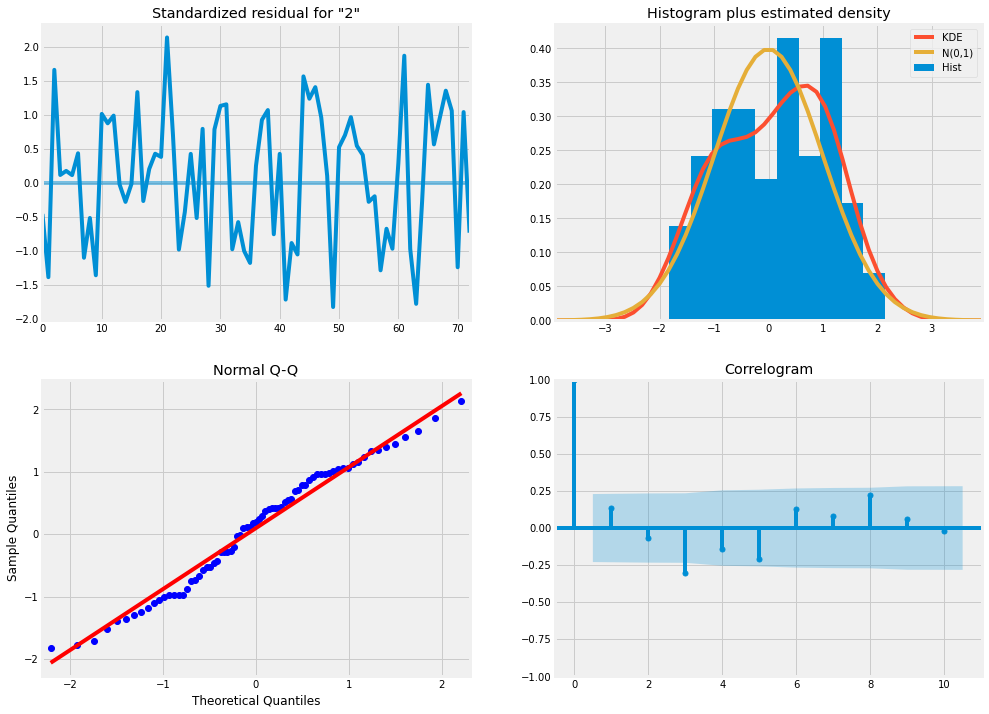

                                   
                                   
                                   
FOR SERIES -- 1996-2018
**********
The winner is: an AIC of 4151.097075953034 with (1, 1, 1) for order terms and (0, 1, 1, 12) for seasonal parameters
----------
                                     SARIMAX Results                                      
Dep. Variable:                              28204   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2071.549
Date:                            Fri, 05 Mar 2021   AIC                           4151.097
Time:                                    18:30:33   BIC                           4164.986
Sample:                                         0   HQIC                          4156.695
                                            - 265                                         
Covariance Type:                              opg                                         
  

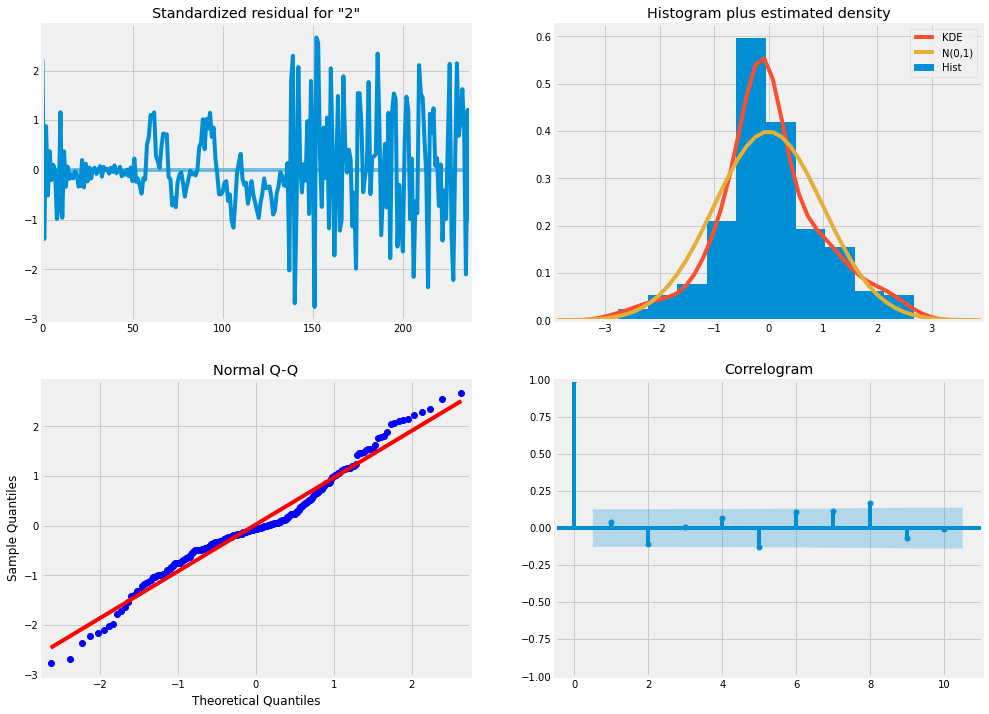

                                   
                                   
                                   
The AIC score for the full Series is 4151.097075953034 and the score is 1328.0371746244832 for the 2010-2018 Series


In [137]:
comparing_series(series1,series2)

Preparing To Evaluate Other Zip Codes In The Top 20
--
Now, I'm ready to evaluate a few other zip codes. I'll investigate the AIC scores for the following zip codes:

- Zip with the second-highest HROI
- Zip with the third-highest HROI
- Zip with the median HROI
- Zip with the lowest HROI

I'll compare each of these zip codes' full Series lowest AIC with its 2010-2018 lowest AIC. Each zip code will need to pass the <b>stationarity_checker</b> test. If it doesn't, I'll do a <b>seasonal_decompose</b> to check for similarity with the initial zip code (28204). Seasonality must be clearly present to justify using SARIMAX.

In [167]:
# Importing the two Series
full_s = pd.read_csv('top_21_series.csv')
short_s = pd.read_csv('series_2010.csv')

The Zip Codes To Analyze:
--
These are the following zip codes I'll be checking:

- 28203 (#2)
- 28205 (#3)
- 28012 (median)
- 28054 (lowest)

In [168]:
# Checking on the Series -- full
full_s

,28054,28056,28012,28120,28034,28164,28098,28032,28205,28210,...,28211,28270,28209,28203,28202,28036,28204,28207,28081,28124
0,70300.0,84900.0,82200.0,83700.0,63300.0,73700.0,63500.0,61200.0,73700.0,135000.0,...,179000.0,185700.0,122600.0,162500.0,120600.0,179200.0,153100.0,406100.0,61900.0,71600.0
1,70600.0,85200.0,82600.0,84000.0,63500.0,73200.0,63800.0,61800.0,74200.0,135200.0,...,179600.0,186300.0,123200.0,162900.0,121800.0,180700.0,153200.0,408700.0,62300.0,71700.0
2,71000.0,85600.0,83100.0,84400.0,63700.0,72700.0,64100.0,62400.0,74800.0,135400.0,...,180200.0,186800.0,123700.0,163300.0,122900.0,182000.0,153400.0,411200.0,62600.0,71700.0
3,71400.0,86000.0,83700.0,84900.0,63900.0,72400.0,64500.0,63000.0,75400.0,135600.0,...,181000.0,187300.0,124300.0,163700.0,124100.0,183100.0,153500.0,413700.0,62900.0,71600.0
4,71800.0,86500.0,84200.0,85500.0,64200.0,72200.0,65000.0,63600.0,76000.0,135700.0,...,181900.0,187600.0,125000.0,164000.0,125100.0,184000.0,153700.0,415900.0,63100.0,71600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,134400.0,171100.0,180500.0,168200.0,125100.0,177800.0,129400.0,127900.0,247100.0,356200.0,...,466800.0,370000.0,404400.0,584300.0,364200.0,390600.0,560300.0,1216100.0,125600.0,140900.0
261,135900.0,171900.0,180300.0,169000.0,126100.0,178300.0,130200.0,128000.0,251500.0,357400.0,...,469900.0,372300.0,405600.0,588900.0,366100.0,390700.0,570500.0,1225200.0,125700.0,141100.0
262,137600.0,172300.0,181400.0,170000.0,126900.0,178800.0,131100.0,128400.0,256300.0,359100.0,...,474800.0,374800.0,407300.0,595500.0,368000.0,393400.0,576400.0,1230900.0,125800.0,143300.0
263,139400.0,173400.0,184100.0,172100.0,127700.0,180900.0,132200.0,129700.0,262000.0,362200.0,...,482600.0,377700.0,411600.0,605400.0,370300.0,397900.0,580200.0,1235400.0,126700.0,147900.0


In [169]:
# Checking on the Series -- short
short_s

,28054,28056,28012,28120,28034,28164,28098,28032,28205,28210,...,28211,28270,28209,28203,28202,28036,28204,28207,28081,28124
0,107500.0,137500.0,138200.0,133900.0,102000.0,141400.0,98800.0,99800.0,139700.0,241700.0,...,326600.0,269800.0,255400.0,382500.0,286700.0,319400.0,353900.0,884700.0,109900.0,128700.0
1,107400.0,137600.0,138100.0,134000.0,102100.0,141800.0,98600.0,99200.0,139600.0,241100.0,...,325900.0,270000.0,255500.0,383100.0,287700.0,318800.0,355900.0,884400.0,109800.0,129400.0
2,106800.0,137600.0,138200.0,133900.0,101800.0,141600.0,99200.0,99100.0,139800.0,240900.0,...,326500.0,270300.0,255300.0,385300.0,284700.0,319900.0,354400.0,889300.0,109600.0,131100.0
3,105800.0,137800.0,138200.0,134100.0,100600.0,141300.0,100400.0,99100.0,139400.0,240400.0,...,323800.0,269700.0,254400.0,387100.0,279100.0,321600.0,348300.0,887300.0,108700.0,132800.0
4,104700.0,138000.0,137600.0,134100.0,99000.0,141400.0,100700.0,98700.0,138700.0,239700.0,...,319500.0,269100.0,253100.0,387100.0,275700.0,321800.0,344600.0,880700.0,107800.0,133600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,134400.0,171100.0,180500.0,168200.0,125100.0,177800.0,129400.0,127900.0,247100.0,356200.0,...,466800.0,370000.0,404400.0,584300.0,364200.0,390600.0,560300.0,1216100.0,125600.0,140900.0
96,135900.0,171900.0,180300.0,169000.0,126100.0,178300.0,130200.0,128000.0,251500.0,357400.0,...,469900.0,372300.0,405600.0,588900.0,366100.0,390700.0,570500.0,1225200.0,125700.0,141100.0
97,137600.0,172300.0,181400.0,170000.0,126900.0,178800.0,131100.0,128400.0,256300.0,359100.0,...,474800.0,374800.0,407300.0,595500.0,368000.0,393400.0,576400.0,1230900.0,125800.0,143300.0
98,139400.0,173400.0,184100.0,172100.0,127700.0,180900.0,132200.0,129700.0,262000.0,362200.0,...,482600.0,377700.0,411600.0,605400.0,370300.0,397900.0,580200.0,1235400.0,126700.0,147900.0


In [170]:
# Preparing the individual Series - full
series_28203_full = full_s['28203']
series_28205_full = full_s['28205']
series_28012_full = full_s['28012']
series_28054_full = full_s['28054']

In [171]:
# Preparing the individual Series - short
series_28203_short = short_s['28203']
series_28205_short = short_s['28205']
series_28012_short = short_s['28012']
series_28054_short = short_s['28054']

Running Stationarity Checks
--
I don't expect any of them to pass, given the performance of the first zip code. If any of them do pass, it may justify it/them as better options for modeling.

In [179]:
# Importing function for checking stationarity
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def stationarity_checker(ts):
    
    
    # For Rolling Statistics -- as needed
    roll_mean = ts.rolling(window=12, center=False).mean()
    roll_std = ts.rolling(window=12, center=False).std()
    
    # Dickey Full
    df_test = adfuller(ts) 
    
    # Rolling statistics -- plotting:
    fig = plt.figure(figsize=(12,6))
    original = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='green', label='Rolling Mean')
    std = plt.plot(roll_std, color='red', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey Full
    print('Results of Dickey-Fuller Test: \n')
    print('---------------------------------')

    df_results = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 
                                             '# of Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_results['The Critical Value (%s)'%key] = value
        
    print(df_results)
    print('---------------------------------')
    
    # Plot Time Series
    ts.plot(figsize=(10,4), color='purple');
    plt.title('Initial Plot of Time Series In Question')
    
    return None

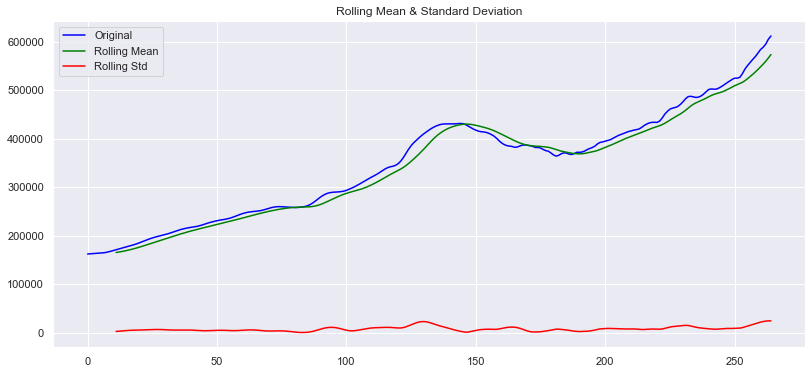

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                   0.378699
p-value                          0.980681
# of Lags Used                  14.000000
Number of Observations Used    250.000000
The Critical Value (1%)         -3.456781
The Critical Value (5%)         -2.873172
The Critical Value (10%)        -2.572969
dtype: float64
---------------------------------


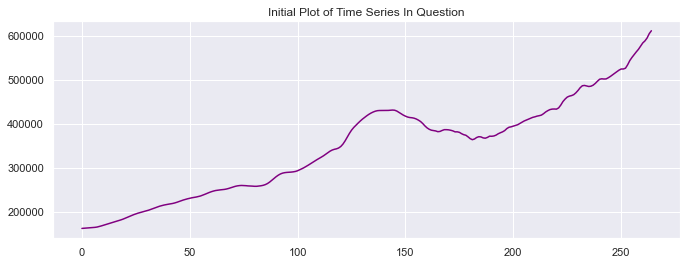

In [180]:
# 28203
stationarity_checker(series_28203_full)

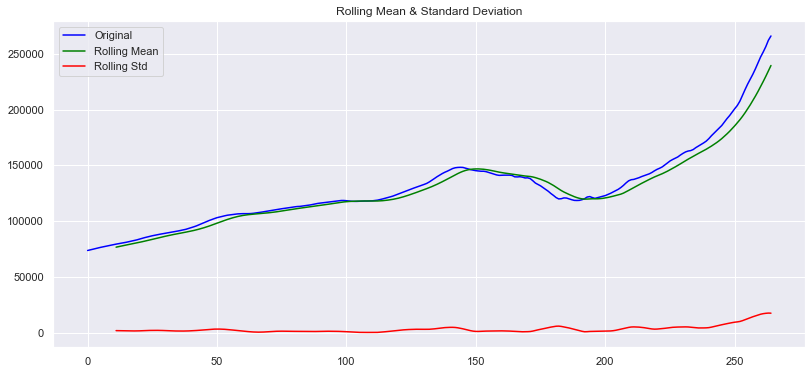

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                   0.833822
p-value                          0.992163
# of Lags Used                  15.000000
Number of Observations Used    249.000000
The Critical Value (1%)         -3.456888
The Critical Value (5%)         -2.873219
The Critical Value (10%)        -2.572994
dtype: float64
---------------------------------


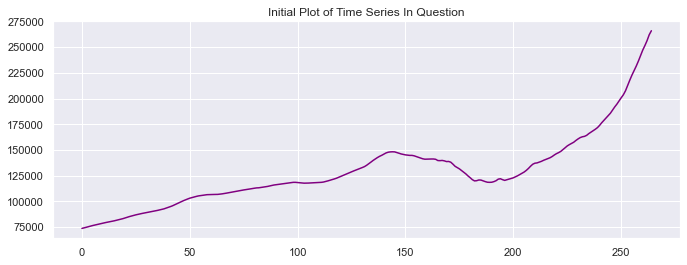

In [181]:
# 28205
stationarity_checker(series_28205_full)

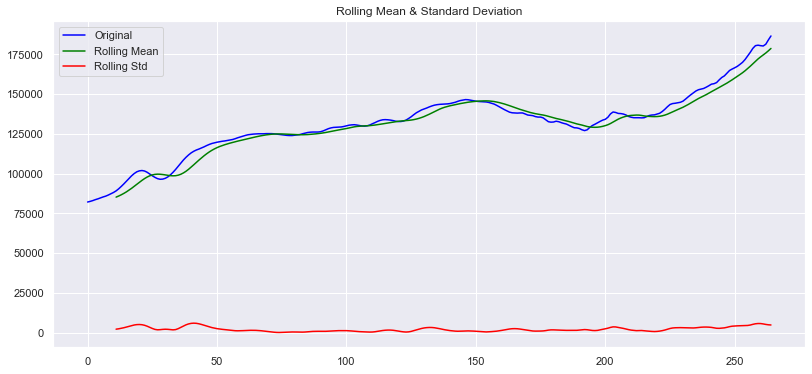

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                   0.328340
p-value                          0.978608
# of Lags Used                  12.000000
Number of Observations Used    252.000000
The Critical Value (1%)         -3.456569
The Critical Value (5%)         -2.873079
The Critical Value (10%)        -2.572919
dtype: float64
---------------------------------


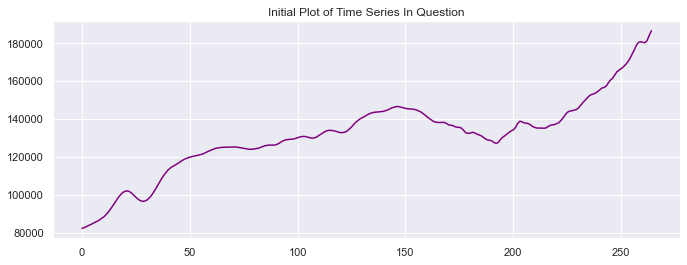

In [182]:
# 28012
stationarity_checker(series_28012_full)

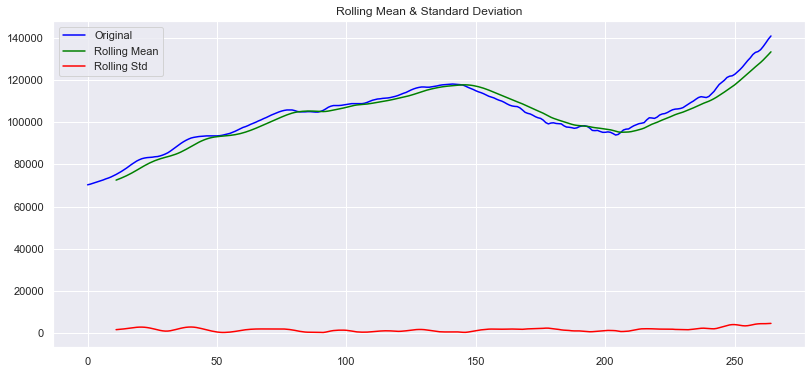

Results of Dickey-Fuller Test: 

---------------------------------
Test Statistic                  -0.226591
p-value                          0.935277
# of Lags Used                  15.000000
Number of Observations Used    249.000000
The Critical Value (1%)         -3.456888
The Critical Value (5%)         -2.873219
The Critical Value (10%)        -2.572994
dtype: float64
---------------------------------


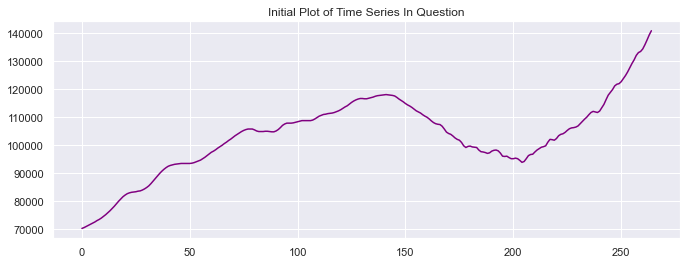

In [183]:
# 28054
stationarity_checker(series_28054_full)